In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kmodes.kmodes import KModes
import functions

sns.set_style('whitegrid')

In [2]:
data_full = pd.read_csv("./data/generated/Analizsiz_v1.3.csv")
data = data_full.sample(1000)

In [3]:
def apply_worker_type(row):
    try:
        return row["newpositiongroupcode"][0]
    except:
        return None
data['worker_type'] = data.apply(apply_worker_type,axis=1)

def apply_level(row):
    try:
        level = row["newpositiongroupcode"][1]
        if level == "O":
            return 0
        return int(level)
    except:
        return -1
    
data['expertise'] = data.apply(apply_level,axis=1)

In [4]:
data = data[["classification", "positiondescription", "mainsectorname","companyId","worker_type","expertise"]]
data.rename(
    columns = {
        'classification':'position_sector', 
        'positiondescription':'position_name',
        "mainsectorname": "company_sector",
        "companyId": "company_id"
    }, 
    inplace = True
)
data = data.dropna()

data = data.drop(["company_id"],axis=1)

data

,position_sector,position_name,company_sector,worker_type,expertise
424742,Arge,Araştırma Geliştirme / Arge Mühendisi,Üretim / Endüstriyel Ürünler,B,2
255420,Hizmet,Saha Amiri,Turizm,B,3
41217,Bilgi Teknolojileri,Yazılım Uzmanı,Ev Eşyaları,B,2
243568,Üretim,Üretim Elemanı,Kimya,M,1
29851,Bilgi Teknolojileri,Grafiker,Perakende,B,2
...,...,...,...,...,...
374992,Reklamcılık,Reklam Rezervasyon Yönetmeni,Medya,B,3
428568,Kalite,Kalite Elemanı,Üretim / Endüstriyel Ürünler,B,1
195503,Eğitim,Fizik Öğretmeni,Eğitim,B,3
36420,Strateji ve Raporlama / Danışmanlık,Metod Mühendisi,Mobilya & Aksesuar,B,2


In [52]:
n_components = 0
for x in data.columns:
    n_components += len(data[x].unique())
n_components

718

In [57]:
import prince
famd = prince.FAMD(
     n_components=n_components,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
famd.fit_transform(data)
sum(famd.explained_inertia_)

0.9999999999999855

In [60]:
for i in range(300,n_components,20):
    famd = prince.FAMD(
         n_components=i,
         n_iter=3,
         copy=True,
         check_input=True,
         engine='auto',
         random_state=42
    )
    famd.fit_transform(data)
    print(i, "->", sum(famd.explained_inertia_))
    
famd = prince.FAMD(
     n_components=n_components,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
famd.fit_transform(data)
print(n_components, "->", sum(famd.explained_inertia_))

300 -> 0.53870126513873
320 -> 0.5669855718055543
340 -> 0.595234164222104
360 -> 0.6234763925231183
380 -> 0.6516656628840205
400 -> 0.6798598705309623
420 -> 0.7080173083730452
440 -> 0.7361561298779777
460 -> 0.7643032091162117
480 -> 0.7924447831717247
500 -> 0.8205602862131568
520 -> 0.8486688004262141
540 -> 0.8767817658007361
560 -> 0.9048714200761703
580 -> 0.932959688083043
600 -> 0.9610517487461153
620 -> 0.9891124545179681
640 -> 0.9980088368086344
660 -> 0.9999999999999853
680 -> 0.9999999999999855
700 -> 0.9999999999999857
718 -> 0.9999999999999855


In [32]:
X = pd.DataFrame(
     data=[
         ['A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],
         ['A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],
         ['B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],
         ['B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],
         ['B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],
         ['B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
 )
X['Oak type'] = [1, 2, 2, 2, 1, 1]
X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,A,A,A,2,5,7,6,3,6,7,1
Wine 2,A,A,A,4,4,4,2,4,4,3,2
Wine 3,B,A,B,5,2,1,1,7,1,1,2
Wine 4,B,A,B,7,2,1,2,2,2,2,2
Wine 5,B,B,B,3,5,6,5,2,6,6,1
Wine 6,B,B,A,3,5,4,5,1,7,5,1


In [36]:
famd = prince.FAMD(
     n_components=2,
     n_iter=30,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
famd = famd.fit(X.drop('Oak type', axis='columns'))
famd.row_coordinates(X)

,0,1
Wine 1,-1.488689,-1.002711
Wine 2,-0.449783,-1.354847
Wine 3,1.774255,-0.258528
Wine 4,1.565402,0.016484
Wine 5,-0.349655,1.516425
Wine 6,-1.051531,1.083178


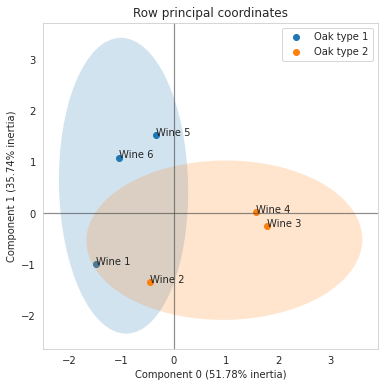

In [37]:
ax = famd.plot_row_coordinates(
     X,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )